# Chicago Crime Data Analysis

## **Introduction**

Crime is a significant challenge in urban areas, affecting safety, economic growth, and social well-being. This analysis aims to analyze crime data in the City of Chicago to uncover spatial and temporal patterns, identify high-crime areas, and develop predictive models to assist in crime prevention strategies. The dataset, sourced from the [City of Chicago's Crime Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data), spans from January 19, 2021, to January 19, 2025. 

### **Objectives**
1. **Explore Crime Trends**: Analyze crime distribution over time and across locations to identify trends and anomalies.
2. **Cluster High-Crime Areas**: Use clustering techniques to pinpoint crime hotspots for targeted interventions.
3. **Predict Arrest Likelihood**: Develop machine learning models to predict arrests and understand the factors influencing them.
4. **Generate Actionable Insights**: Provide recommendations for resource allocation, community engagement, and policy changes based on the analysis.

This notebook will guide you through the end-to-end process, including data cleaning, exploratory data analysis (EDA), advanced statistical modeling, and clustering. The goal is to translate raw data into actionable insights for policymakers and law enforcement.

## Data Loading

The dataset contains information on reported incidents of crime in Chicago, including details such as:

- **Case Information**: Unique case ID, primary crime type, and description.
- **Location Details**: Community area, district, latitude, and longitude.
- **Temporal Information**: Date, time, and year of the incident.
- **Arrest Details**: Whether an arrest was made and whether the incident was domestic-related.

For this analysis, only data from **January 19, 2021, 4:24:01 PM** to **January 19, 2025, 4:24:01 PM** was extracted to focus on recent trends.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [4]:
# importing data 
file_path = "data.csv"
crime_data = pd.read_csv(file_path)

In [5]:
# display basic information about the dataset
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963925 entries, 0 to 963924
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    963925 non-null  int64  
 1   Case Number           963925 non-null  object 
 2   Date                  963925 non-null  object 
 3   Block                 963925 non-null  object 
 4   IUCR                  963925 non-null  object 
 5   Primary Type          963925 non-null  object 
 6   Description           963925 non-null  object 
 7   Location Description  959510 non-null  object 
 8   Arrest                963925 non-null  bool   
 9   Domestic              963925 non-null  bool   
 10  Beat                  963925 non-null  int64  
 11  District              963925 non-null  int64  
 12  Ward                  963901 non-null  float64
 13  Community Area        963923 non-null  float64
 14  FBI Code              963925 non-null  object 
 15  

In [6]:
# view the first few rows
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13717231,JJ111092,01/11/2025 12:00:00 AM,005XX W TAYLOR ST,0460,BATTERY,SIMPLE,RESTAURANT,False,False,...,28.0,28.0,08B,1173111.0,1895890.0,2025,01/18/2025 03:41:34 PM,41.869751,-87.639927,"(41.869750819, -87.63992721)"
1,13717822,JJ111945,01/11/2025 12:00:00 AM,067XX S GREEN ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,16.0,68.0,08B,1171797.0,1860216.0,2025,01/18/2025 03:41:34 PM,41.771887,-87.645799,"(41.771886964, -87.645799236)"
2,13718308,JJ112398,01/11/2025 12:00:00 AM,036XX W FRANKLIN BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,27.0,23.0,26,1152197.0,1903092.0,2025,01/18/2025 03:41:34 PM,41.889952,-87.716519,"(41.889951797, -87.716518699)"
3,13717655,JJ111716,01/11/2025 12:00:00 AM,040XX N MARMORA AVE,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,...,38.0,15.0,07,1136294.0,1926346.0,2025,01/18/2025 03:41:34 PM,41.954062,-87.774366,"(41.954062293, -87.774365755)"
4,13717644,JJ111613,01/11/2025 12:00:00 AM,018XX S RACINE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25.0,31.0,08A,1168656.0,1891364.0,2025,01/18/2025 03:41:34 PM,41.857429,-87.656414,"(41.857428691, -87.656413714)"


In [7]:
# Check for missing values
missing_summary = crime_data.isnull().sum()
print(missing_summary)

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     4415
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       24
Community Area              2
FBI Code                    0
X Coordinate            12738
Y Coordinate            12738
Year                        0
Updated On                  0
Latitude                12738
Longitude               12738
Location                12738
dtype: int64


In [8]:
# Check basic statistics
print(crime_data.describe(include='all'))

                  ID Case Number                    Date             Block  \
count   9.639250e+05      963925                  963925            963925   
unique           NaN      963795                  469222             35201   
top              NaN    JE266473  01/01/2022 12:00:00 AM  001XX N STATE ST   
freq             NaN           5                     154              2496   
mean    1.297061e+07         NaN                     NaN               NaN   
std     8.019256e+05         NaN                     NaN               NaN   
min     2.573400e+04         NaN                     NaN               NaN   
25%     1.265107e+07         NaN                     NaN               NaN   
50%     1.300874e+07         NaN                     NaN               NaN   
75%     1.336311e+07         NaN                     NaN               NaN   
max     1.372385e+07         NaN                     NaN               NaN   

          IUCR Primary Type Description Location Description  A

## Data Cleaning

To prepare the dataset for analysis, several cleaning steps were performed:

1. **Handling Missing Values**:
   - Rows with missing `Latitude` and `Longitude` were removed, as these fields are critical for spatial analysis.
   - Missing values in the `Location Description` column were replaced with `"Unknown"`.
   - Missing `Ward` and `Community Area` values were replaced with `-1` and converted to integers to maintain consistency.

2. **Data Type Conversions**:
   - The `Date` column was converted to a `datetime` format to enable temporal analysis.
   - The `Arrest` and `Domestic` columns were converted to boolean types for easier categorization.

3. **Feature Engineering**:
   - New columns were created to facilitate analysis:
     - **Month**: Extracted from the `Date` column.
     - **Weekday**: Derived from the `Date` column to analyze weekly trends.
     - **Hour**: Extracted from the `Date` column to study hourly patterns.

4. **Dropping Unnecessary Columns**:
   - Columns that were not required for analysis, such as `Updated On`, `X Coordinate`, `Y Coordinate`, and `Location`, were removed.

5. **Validating the Cleaned Dataset**:
   - After cleaning, the dataset was validated to ensure correctness:
     - Checked the data structure using `info()` to confirm appropriate data types.
     - Previewed the first few rows to verify data integrity.

In [10]:
# Handle missing values
crime_data = crime_data.dropna(subset=['Latitude', 'Longitude'])  # Drop rows with missing coordinates
crime_data['Location Description'] = crime_data['Location Description'].fillna('Unknown')
crime_data['Ward'] = crime_data['Ward'].fillna(-1).astype(int)  # Replace missing Ward with -1
crime_data['Community Area'] = crime_data['Community Area'].fillna(-1).astype(int)

# Convert data types
crime_data['Date'] = pd.to_datetime(crime_data['Date'])  # Convert Date to datetime
crime_data['Arrest'] = crime_data['Arrest'].astype(bool)
crime_data['Domestic'] = crime_data['Domestic'].astype(bool)

# Create derived columns
crime_data['Month'] = crime_data['Date'].dt.month
crime_data['Weekday'] = crime_data['Date'].dt.day_name()
crime_data['Hour'] = crime_data['Date'].dt.hour

# Drop unnecessary columns
columns_to_drop = ['Updated On', 'X Coordinate', 'Y Coordinate', 'Location']
crime_data = crime_data.drop(columns=columns_to_drop)

# Validate the cleaned data
print(crime_data.info())  # Verify column types and row count
print(crime_data.head())  # Preview the cleaned dataset

<class 'pandas.core.frame.DataFrame'>
Index: 951187 entries, 0 to 963924
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    951187 non-null  int64         
 1   Case Number           951187 non-null  object        
 2   Date                  951187 non-null  datetime64[ns]
 3   Block                 951187 non-null  object        
 4   IUCR                  951187 non-null  object        
 5   Primary Type          951187 non-null  object        
 6   Description           951187 non-null  object        
 7   Location Description  951187 non-null  object        
 8   Arrest                951187 non-null  bool          
 9   Domestic              951187 non-null  bool          
 10  Beat                  951187 non-null  int64         
 11  District              951187 non-null  int64         
 12  Ward                  951187 non-null  int64         
 13  Comm

## Exploratory Data Analysis (EDA)

The purpose of EDA is to explore and understand the crime dataset by identifying trends, distributions, and anomalies. Key questions addressed in this section include:

1. **Crime Trends**:
   - How do crimes vary by time (hour, weekday, month)?
   - What are the most common crime types?

2. **Arrests and Domestic Crimes**:
   - What is the distribution of arrests across crime types?
   - How common are domestic-related crimes?

3. **Geographic Analysis**:
   - Which community areas and districts have the highest crime rates?
   - How are crimes distributed spatially in Chicago?

EDA will use a combination of descriptive statistics, visualizations, and summaries to answer these questions.

### **Crime Trends**

#### Crime Counts by Year

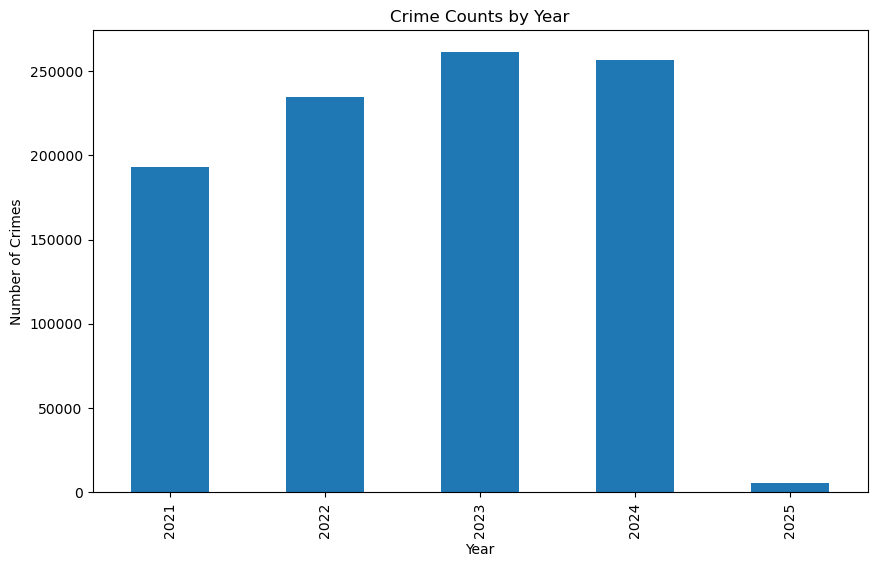

Crime Counts by Year:
Year
2021    192985
2022    234885
2023    261253
2024    256495
2025      5569
Name: count, dtype: int64


In [14]:
# Crime counts by year
crime_by_year = crime_data['Year'].value_counts().sort_index()
crime_by_year.plot(kind='bar', figsize=(10, 6), title='Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

crime_by_year = crime_data['Year'].value_counts().sort_index()
print("Crime Counts by Year:")
print(crime_by_year)

#### Crime Counts By Month

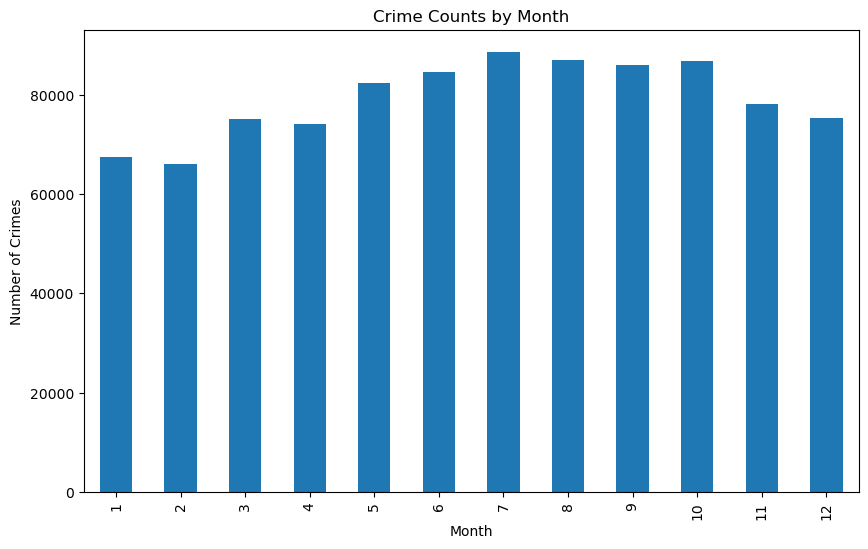

Crime Counts by Month:
Month
1     67504
2     65963
3     75082
4     74018
5     82367
6     84560
7     88616
8     86901
9     86037
10    86761
11    78041
12    75337
Name: count, dtype: int64


In [16]:
# Crime counts by month (all years: 2021 to 2025)
crime_by_month = crime_data['Month'].value_counts().sort_index()
crime_by_month.plot(kind='bar', figsize=(10, 6), title='Crime Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

crime_by_month = crime_data['Month'].value_counts().sort_index()
print("Crime Counts by Month:")
print(crime_by_month)

#### Crime Counts by Weekday

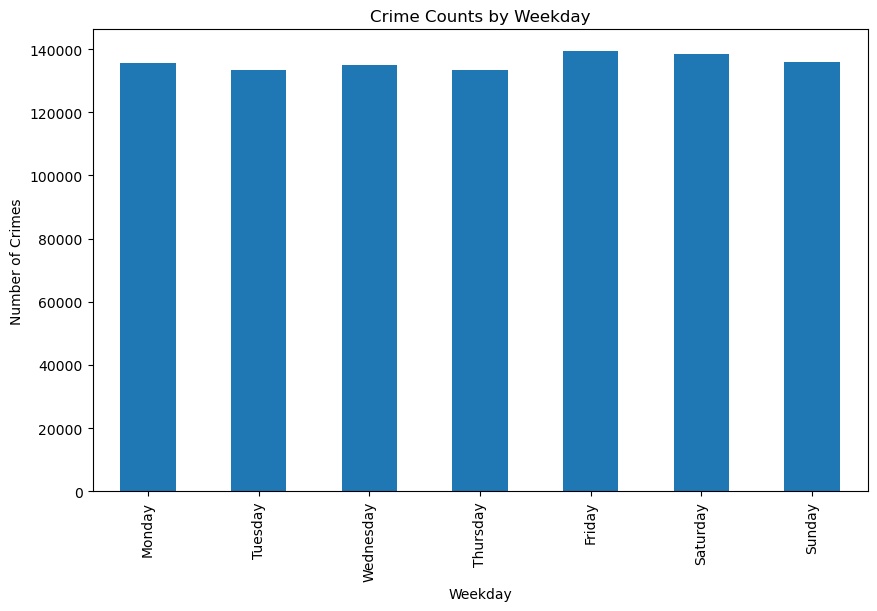

Crime Counts by Weekday:
Weekday
Monday       135607
Tuesday      133348
Wednesday    135000
Thursday     133511
Friday       139298
Saturday     138541
Sunday       135882
Name: count, dtype: int64


In [18]:
# Define the correct order for the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Weekday' column to a categorical type with the defined order
crime_data['Weekday'] = pd.Categorical(crime_data['Weekday'], categories=weekday_order, ordered=True)

# Recalculate crime counts by weekday with the correct order
crime_by_weekday = crime_data['Weekday'].value_counts().sort_index()

# Plot the data
crime_by_weekday.plot(kind='bar', figsize=(10, 6), title='Crime Counts by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Crimes')
plt.show()

# Print the reordered counts
print("Crime Counts by Weekday:")
print(crime_by_weekday)

#### Crime Counts by Hour

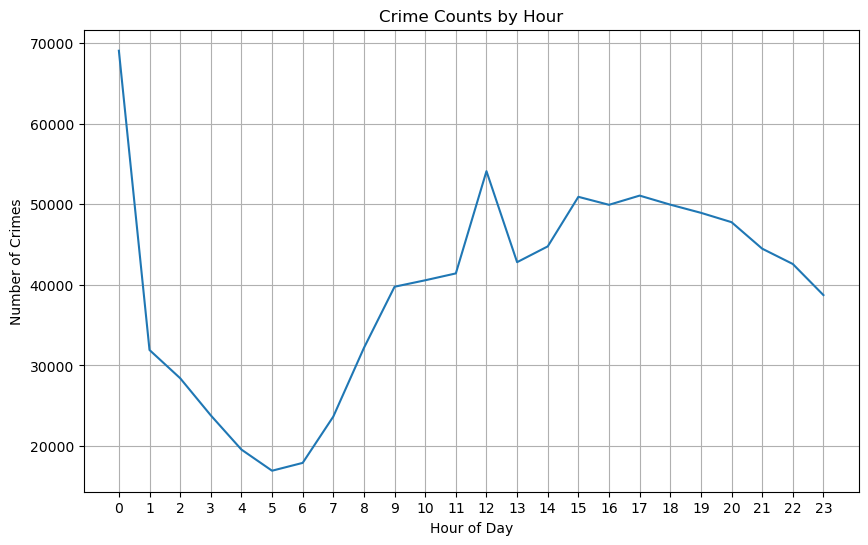

Crime Counts by Hour:
Hour
0     69053
1     31911
2     28411
3     23801
4     19555
5     16928
6     17900
7     23650
8     32172
9     39763
10    40563
11    41415
12    54105
13    42811
14    44768
15    50921
16    49930
17    51072
18    49950
19    48936
20    47775
21    44487
22    42585
23    38725
Name: count, dtype: int64


In [20]:
# Crime counts by hour
crime_by_hour = crime_data['Hour'].value_counts().sort_index()
crime_by_hour.plot(kind='line', figsize=(10, 6), title='Crime Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

crime_by_hour = crime_data['Hour'].value_counts().sort_index()
print("Crime Counts by Hour:")
print(crime_by_hour)

#### Key Observations

#### Crime Counts by Year
- **Trend**: Crime increased from 2021 to a peak in **2023 (261,253 crimes)**, with a slight decline in 2024. **2025 (5,569 crimes)** appears low due to incomplete data (January only).
- **Insight**: Investigate specific crime types, areas, or social factors contributing to this rise.

---

#### Crime Counts by Month
- **Trend**: Crime peaks in **summer (June–August)**, with **July (88,616 crimes)** highest. Lowest counts occur in **January and February**.
- **Insight**: Allocate additional resources in summer, considering factors like warmer weather, events, or social activities.

---

#### Crime Counts by Weekday
- **Trend**: Crimes are evenly distributed across weekdays. **Friday (139,298 crimes)** is slightly higher, and **Tuesday (133,348 crimes)** is the lowest.
- **Insight**: Apply consistent strategies throughout the week.

---

#### Crime Counts by Hour
- **Trend**: 
  - **Midnight Spike**: Highest at **12:00 AM (69,053 crimes)**, linked to nightlife.
  - **Early Morning Low**: Lowest at **5:00 AM (16,928 crimes)**.
  - **Afternoon Peaks**: Gradual rise after **6:00 AM**, peaking at **12:00 PM (54,105 crimes)** and **3:00 PM (50,921 crimes)**.
  - **Evening Plateau**: High activity declines after **7:00 PM**.
- **Insight**:
  1. Enhance patrols during late-night and nightlife hours.
  2. Focus on areas near schools, workplaces, and transit hubs during afternoon peaks.
  3. Reallocate resources from early mornings to higher-crime periods.
 
---

#### Top 10 Crime Types

Top 10 Crime Types:
Primary Type
THEFT                  209692
BATTERY                170504
CRIMINAL DAMAGE        109868
ASSAULT                 86646
MOTOR VEHICLE THEFT     82524
DECEPTIVE PRACTICE      61882
OTHER OFFENSE           60306
ROBBERY                 36773
WEAPONS VIOLATION       33803
BURGLARY                29904
Name: count, dtype: int64


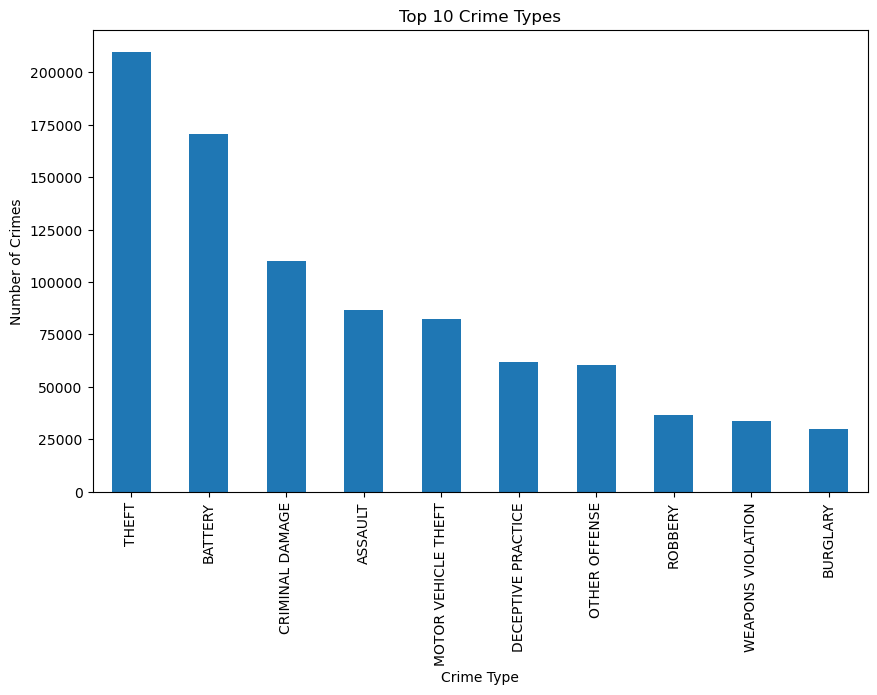

In [23]:
# Top 10 most common crime types
top_crime_types = crime_data['Primary Type'].value_counts().head(10)
print("Top 10 Crime Types:")
print(top_crime_types)

# Plot the top 10 crime types
top_crime_types.plot(kind='bar', figsize=(10, 6), title='Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

### **Arrest and Dometic Crimes**

#### Arrest Rates by Crime Type 

Arrest Rates by Crime Type:
Primary Type
WEAPONS VIOLATION      0.607372
OTHER OFFENSE          0.154214
BATTERY                0.153492
ASSAULT                0.099335
ROBBERY                0.060833
THEFT                  0.049754
BURGLARY               0.049692
CRIMINAL DAMAGE        0.034223
MOTOR VEHICLE THEFT    0.028149
DECEPTIVE PRACTICE     0.027084
Name: Arrest, dtype: float64


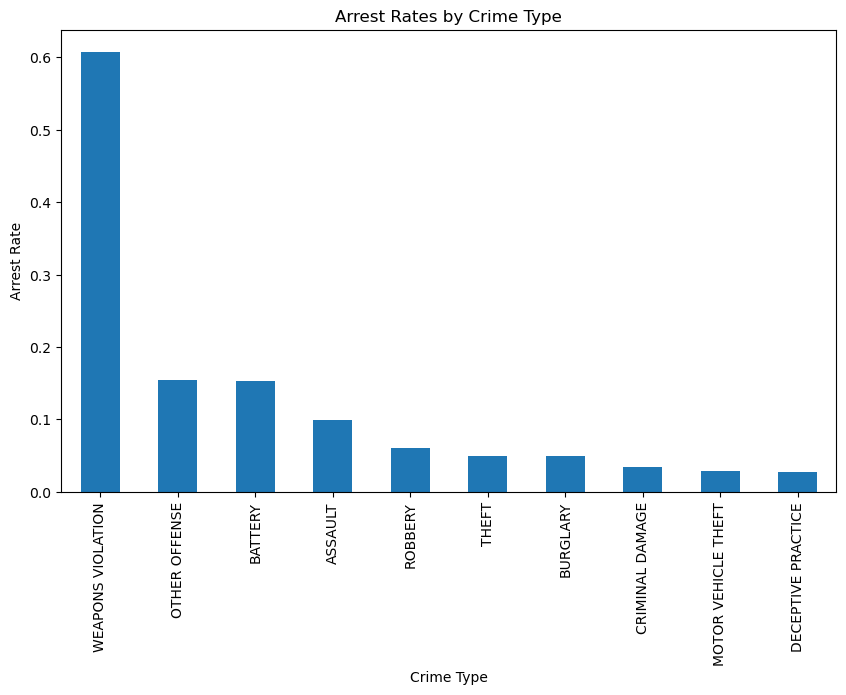

In [26]:
# Arrest rates for the top 10 crime types
top_crime_data = crime_data[crime_data['Primary Type'].isin(top_crime_types.index)]
arrest_rates = top_crime_data.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
print("Arrest Rates by Crime Type:")
print(arrest_rates)

# Plot arrest rates for the top 10 crime types
arrest_rates.plot(kind='bar', figsize=(10, 6), title='Arrest Rates by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.show()

#### Proportion of Domestic Crimes 

Proportion of Domestic Crimes:
Domestic
False    766476
True     184711
Name: count, dtype: int64


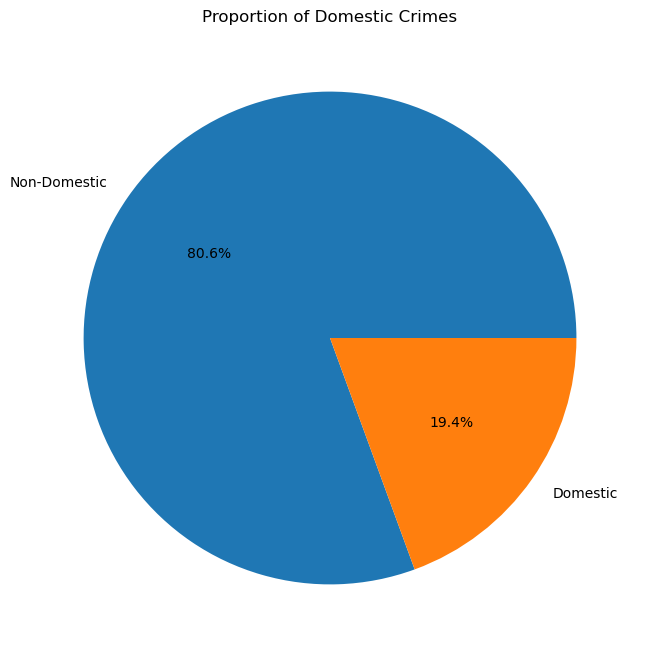

In [28]:
# Domestic vs. Non-Domestic Crimes
domestic_counts = crime_data['Domestic'].value_counts()
print("Proportion of Domestic Crimes:")
print(domestic_counts)

# Plot domestic crime proportions
domestic_counts.plot(kind='pie', figsize=(8, 8), labels=['Non-Domestic', 'Domestic'], autopct='%1.1f%%', title='Proportion of Domestic Crimes')
plt.ylabel('')
plt.show()

#### Key Observations

#### 1. Top 10 Crime Types
- **Theft** is the most common crime, with 209,692 reported incidents, followed by **Battery** (170,504), **Criminal Damage** (109,868), and **Assault** (86,646).
- Less frequent crimes in the top 10 include **Weapons Violation** (33,803) and **Burglary** (29,904).

---
#### 2. Arrest Rates by Crime Type
- **Highest Arrest Rates**:
  - **Weapons Violation**: 60.7%, reflecting strong law enforcement focus.
  - **Battery**: 15.3% and **Assault**: 9.9% indicate relatively higher prioritization.
- **Lowest Arrest Rates**:
  - **Deceptive Practice**: 2.7% and **Motor Vehicle Theft**: 2.8%, possibly due to challenges in investigations or resource allocation.

---
#### 3. Proportion of Domestic Crimes
- **Non-Domestic Crimes**: 76.7% of total incidents.
- **Domestic Crimes**: 23.3% (184,711 incidents), indicating a significant subset.
---

### **Geographic Analysis**

#### Crime Counts by Community Area and District

Crime Counts by Community Area:
Community Area
25    48726
8     40787
28    37182
43    32578
32    31143
24    28346
29    26148
23    25633
71    25386
69    24517
Name: count, dtype: int64


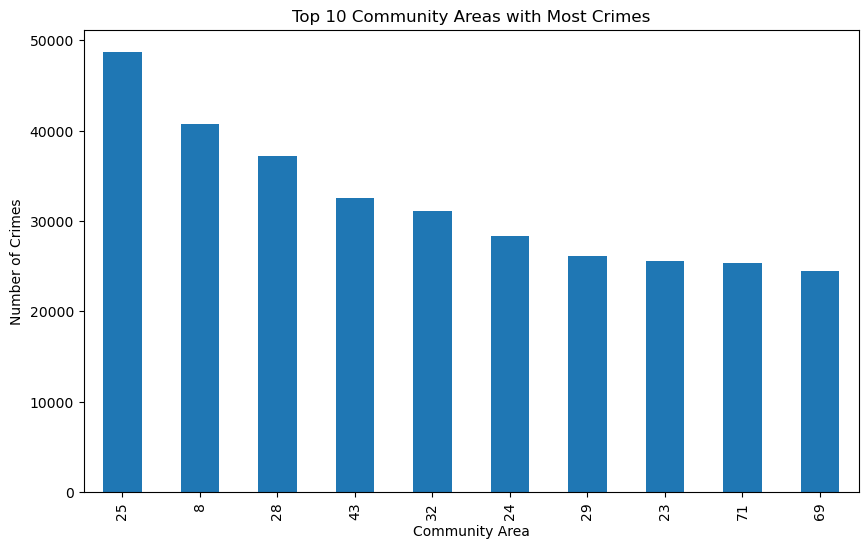

Crime Counts by District:
District
8     60974
6     58006
12    56379
4     54267
11    53451
1     50486
25    49257
19    48663
18    48450
3     48102
Name: count, dtype: int64


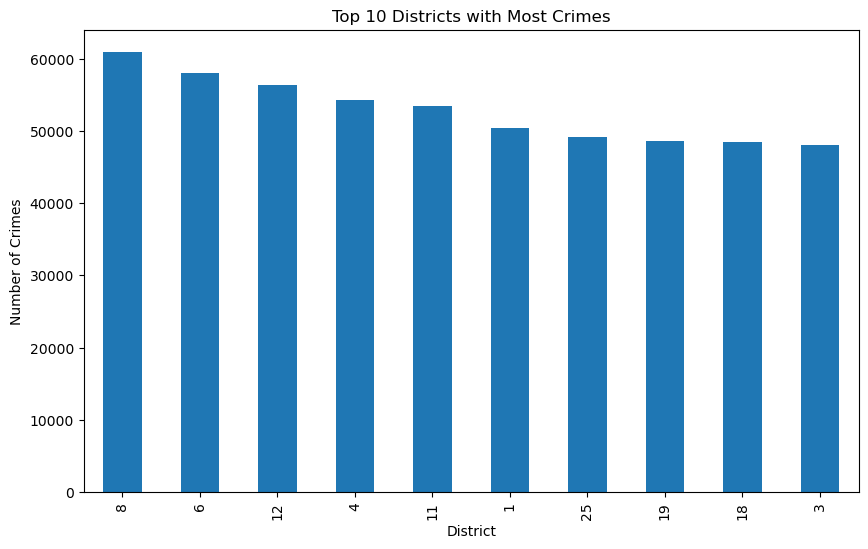

In [32]:
# Crime counts by Community Area
crime_by_community = crime_data['Community Area'].value_counts()
print("Crime Counts by Community Area:")
print(crime_by_community.head(10))  # Display top 10 areas

# Plot crime counts by Community Area
crime_by_community.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Community Areas with Most Crimes')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.show()

# Crime counts by District
crime_by_district = crime_data['District'].value_counts()
print("Crime Counts by District:")
print(crime_by_district.head(10))  # Display top 10 districts

# Plot crime counts by District
crime_by_district.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Districts with Most Crimes')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.show()

#### Crime Hotspots (Heatmap)

Filtered Data Size: (929740, 21)


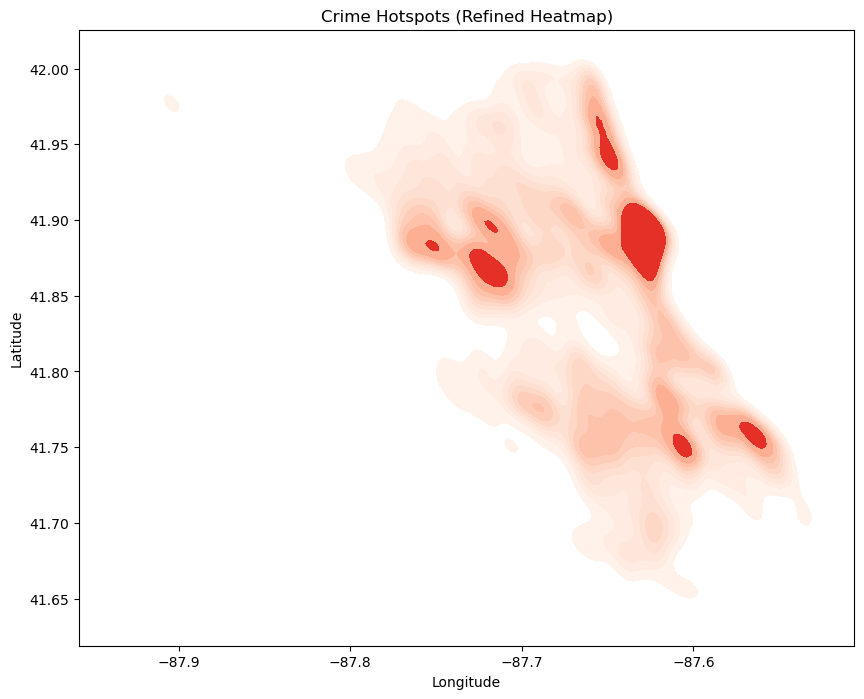

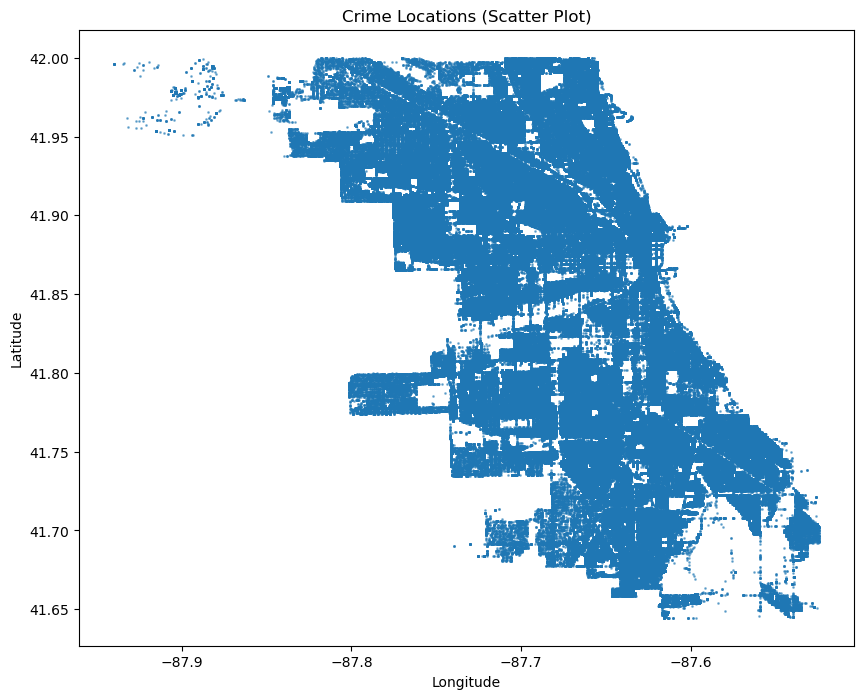

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for valid Chicago coordinates
filtered_crime_data = crime_data[
    (crime_data['Latitude'] >= 41) & (crime_data['Latitude'] <= 42) &
    (crime_data['Longitude'] >= -88) & (crime_data['Longitude'] <= -87)
]

# Check the filtered data
print(f"Filtered Data Size: {filtered_crime_data.shape}")

# Replot the heatmap using filtered data
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=filtered_crime_data['Longitude'],
    y=filtered_crime_data['Latitude'],
    cmap='Reds',
    fill=True,
    thresh=0.1
)
plt.title('Crime Hotspots (Refined Heatmap)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Scatter plot of crime locations
plt.figure(figsize=(10, 8))
plt.scatter(
    filtered_crime_data['Longitude'], 
    filtered_crime_data['Latitude'], 
    s=1, alpha=0.5
)
plt.title('Crime Locations (Scatter Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Crime Type Distribution by Community Area 

Top 10 Community Areas for Theft:
Community Area
8     15540
32    12486
28    11923
24     9538
6      9097
25     7189
7      6236
22     6082
43     4972
3      4750
Name: THEFT, dtype: int64


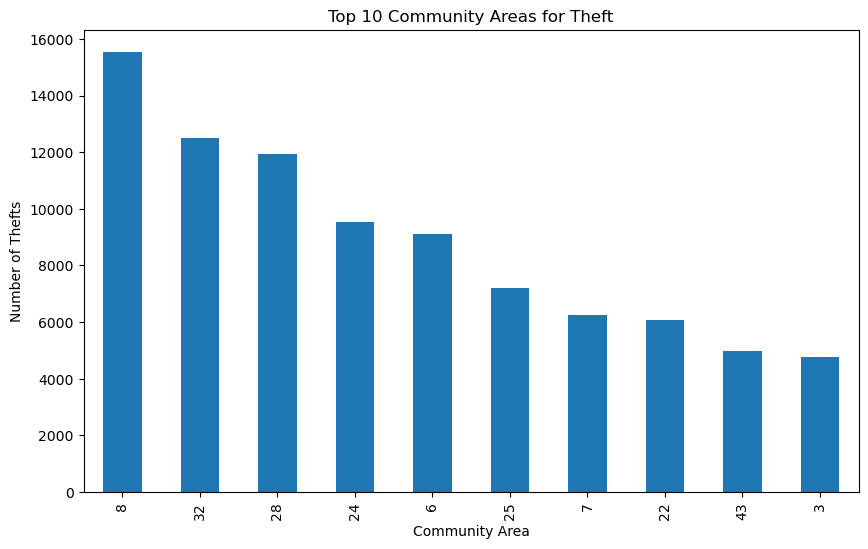

In [36]:
# Group by Community Area and Primary Type
crime_by_type_area = crime_data.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)

# Display top 10 Community Areas for Theft
top_theft_areas = crime_by_type_area['THEFT'].sort_values(ascending=False).head(10)
print("Top 10 Community Areas for Theft:")
print(top_theft_areas)

# Plot the data
top_theft_areas.plot(kind='bar', figsize=(10, 6), title='Top 10 Community Areas for Theft')
plt.xlabel('Community Area')
plt.ylabel('Number of Thefts')
plt.show()

#### Key Observations

---

#### Crime Counts by Community Area
**Results**:
- The top 3 community areas with the highest crime counts are:
  1. **Austin (Community Area 25)**: 48,726 crimes
  2. **Near North Side (Community Area 8)**: 40,787 crimes
  3. **Loop (Community Area 28)**: 37,182 crimes

**Observations**:
- Community Area 25 (Austin) consistently reports the highest crime counts, indicating a need for concentrated interventions.
- The Loop (Area 28) and Near North Side (Area 8) also show high crime activity, likely due to their commercial and tourist-heavy nature.

---

#### Crime Counts by District
**Results**:
The top 3 districts with the highest crime counts are:
  1. **District 8**: 60,974 crimes
  2. **District 6**: 58,006 crimes
  3. **District 12**: 56,379 crimes

**Observations**:
- District 8 reports the highest crime counts, highlighting it as a critical area for law enforcement.
- Districts 6 and 12 also require focused efforts, as they represent significant portions of overall crime.

---

#### Heatmap of Crime Density
The heatmap reveals several key hotspots of crime activity across Chicago:
- **Downtown Core**: High concentration of crimes, particularly in the Loop and Near North Side.
- **South and West Sides**: Consistently higher crime densities in areas like Austin and Englewood.

**Actionable Insights**:
- Deploy additional resources in hotspots identified through the heatmap.
- Consider targeted initiatives in areas with high densities of violent or property crimes.

---

#### Recommendations Based on Geographical Analysis
1. **Resource Allocation**:
   - Increase law enforcement presence in high-crime community areas (Austin, Near North Side, and the Loop).
   - Use the heatmap insights to guide patrol routes and strategic station placements.

2. **Community Engagement**:
   - Engage community organizations in high-crime areas to address root causes.
   - Collaborate with local businesses and residents in the Loop and Near North Side to enhance surveillance and public awareness.

3. **Policy Focus**:
   - Address systemic issues in South and West Side neighborhoods where crime density is persistently high.
   - Expand programs targeting property and violent crimes in these regions.
---

### **Cross Analysis**

This section explores relationships between multiple variables to identify deeper insights. Key questions include:

1. **How do specific crime types vary by time (hour, weekday, month)?**
2. **Which crime types are most prevalent in high-crime locations?**
3. **How do arrest rates vary across crime types and locations?**

By combining these variables, we aim to uncover actionable patterns for targeted interventions.

**Note:** We are only looking at "Theft" and "Battery"

#### Theft Incidents by Hour and Community Area

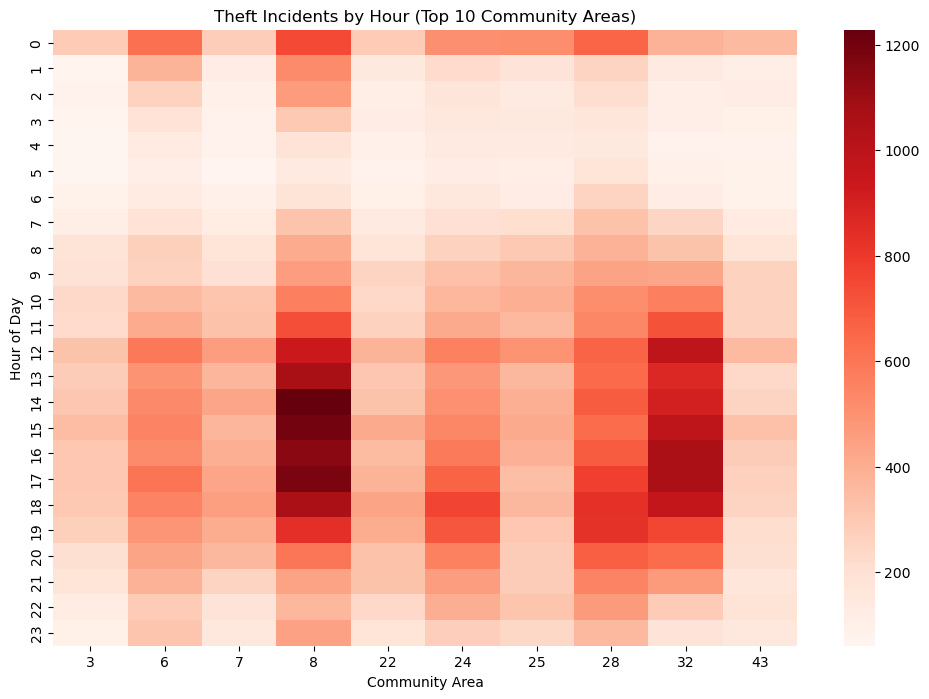

In [40]:
# Filter data for theft incidents
theft_data = crime_data[crime_data['Primary Type'] == 'THEFT']

# Filter top 10 community areas with the most theft incidents
top_theft_areas = theft_data['Community Area'].value_counts().head(10).index
filtered_theft_data = theft_data[theft_data['Community Area'].isin(top_theft_areas)]

# Group by Hour and Community Area (filtered)
filtered_theft_by_hour_area = filtered_theft_data.groupby(['Hour', 'Community Area']).size().unstack(fill_value=0)

# Plot heatmap for filtered top community areas
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_theft_by_hour_area, cmap='Reds', xticklabels=True, yticklabels=True)
plt.title('Theft Incidents by Hour (Top 10 Community Areas)')
plt.xlabel('Community Area')
plt.ylabel('Hour of Day')
plt.show()

#### Arrest Rates for Theft by Community Area

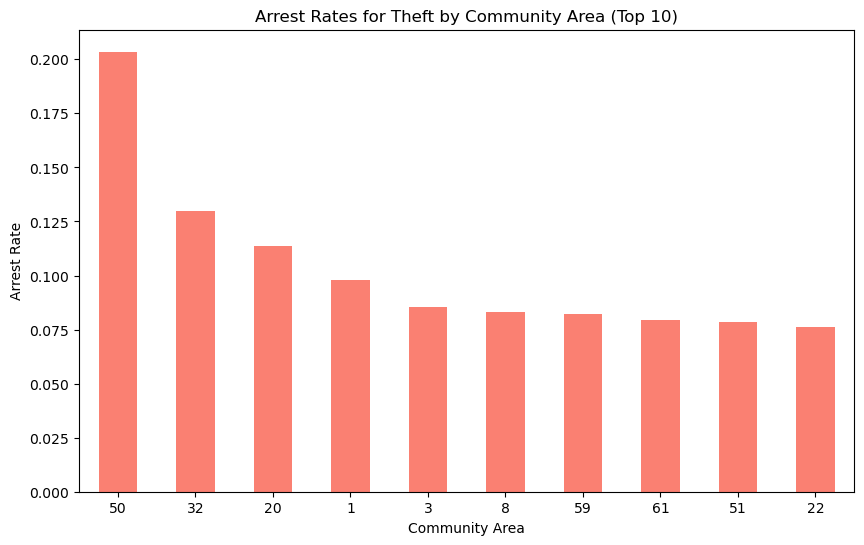

Arrest Rates for Theft by Community Area (Top 10):
Community Area
50    0.203518
32    0.129745
20    0.113482
1     0.097704
3     0.085474
8     0.083076
59    0.082265
61    0.079228
51    0.078571
22    0.076126
Name: Arrest, dtype: float64


In [42]:
# Calculate arrest rates for theft by community area
theft_arrest_by_area = theft_data.groupby('Community Area')['Arrest'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
theft_arrest_by_area.plot(kind='bar', color='salmon')
plt.title('Arrest Rates for Theft by Community Area (Top 10)')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=0)
plt.show()

# Print results
print("Arrest Rates for Theft by Community Area (Top 10):")
print(theft_arrest_by_area)

#### Battery Incidents by Hour and Community Area

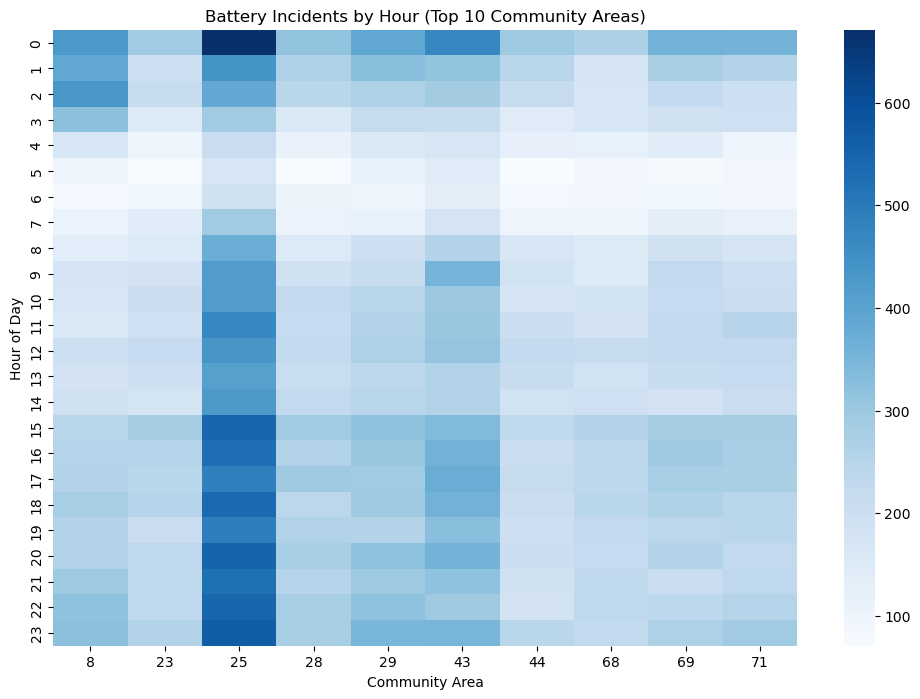

In [45]:
# Filter data for battery incidents
battery_data = crime_data[crime_data['Primary Type'] == 'BATTERY']

# Get top 10 community areas for battery incidents
top_10_battery_areas = battery_data['Community Area'].value_counts().head(10).index

# Filter battery data for top 10 community areas
filtered_battery_data = battery_data[battery_data['Community Area'].isin(top_10_battery_areas)]

# Group by hour and community area
battery_hour_area_top10 = filtered_battery_data.groupby(['Hour', 'Community Area']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(battery_hour_area_top10, cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Battery Incidents by Hour (Top 10 Community Areas)')
plt.xlabel('Community Area')
plt.ylabel('Hour of Day')
plt.show()

#### Arrest Rates for Battery by Community Area

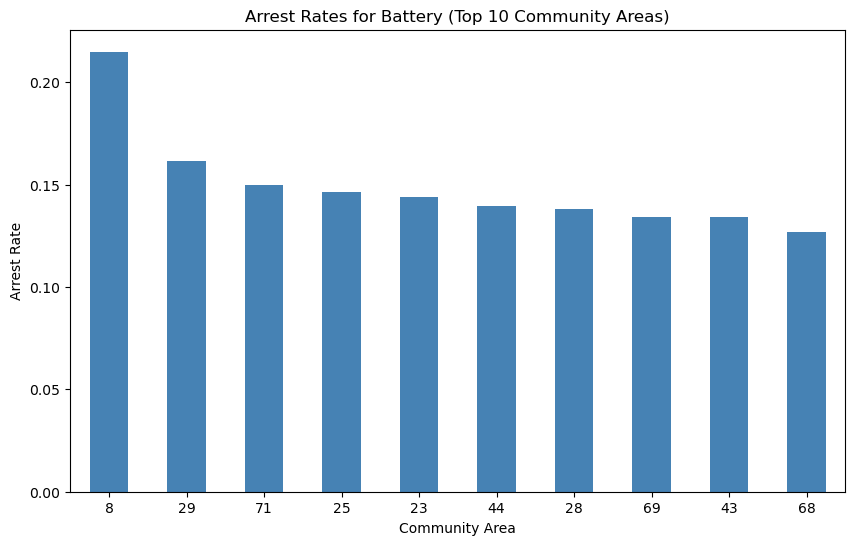

Arrest Rates for Battery (Top 10 Community Areas):
Community Area
8     0.214846
29    0.161654
71    0.149542
25    0.146344
23    0.143685
44    0.139560
28    0.138121
69    0.134270
43    0.134034
68    0.126856
Name: Arrest, dtype: float64


In [47]:
# Get top 10 community areas for battery incidents
top_10_battery_areas = battery_data['Community Area'].value_counts().head(10).index

# Filter battery data for top 10 community areas
filtered_battery_data = battery_data[battery_data['Community Area'].isin(top_10_battery_areas)]

# Calculate arrest rates for battery by community area
battery_arrest_rates_top10 = filtered_battery_data.groupby('Community Area')['Arrest'].mean().sort_values(ascending=False)

# Plot arrest rates
plt.figure(figsize=(10, 6))
battery_arrest_rates_top10.plot(kind='bar', color='steelblue')
plt.title('Arrest Rates for Battery (Top 10 Community Areas)')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=0)
plt.show()

# Print results
print("Arrest Rates for Battery (Top 10 Community Areas):")
print(battery_arrest_rates_top10)

#### Key Observations

#### Theft Incidents by Hour (Top 10 Community Areas
1. **Peak Hours**:
   - Theft incidents peak in the afternoon (12 PM to 4 PM), particularly in Community Areas 8, 32, and 28.
   - This aligns with higher public activity during the day, especially in commercial zones.
2. **Low Activity**:
   - Theft incidents drop significantly during early morning hours (2 AM to 6 AM) across all community areas.

---

#### Arrest Rates for Theft by Community Area (Top 10
1. **Highest Arrest Rates**:
   - Community Area 50 has the highest arrest rate (~20%), suggesting effective law enforcement strategies.
   - Other areas like 32 and 20 also demonstrate relatively higher arrest rates.
2. **Lowest Arrest Rates**:
   - Community Area 22 has the lowest arrest rate among the top 10 areas, highlighting potential resource or process gaps.

---

#### Battery Incidents by Hour (Top 10 Community Areas
1. **Peak Hours**:
   - Battery incidents peak late at night (12 AM to 2 AM) and again in the evening (6 PM to 8 PM).
   - Community Area 25 shows the highest concentration of incidents, especially during peak hours.
2. **Consistent Activity**:
   - Battery incidents occur throughout the day, with reduced activity between 4 AM to 6 AM.

---

#### Arrest Rates for Battery by Community Area (Top 10)
1. **Highest Arrest Rates**:
   - Community Area 8 has the highest arrest rate (~21%), indicating effective enforcement practices.
2. **Moderate Arrest Rates**:
   - Arrest rates for battery are relatively consistent among other top areas, ranging between ~12% and ~17%.

---


## Advanced Statistical Modeling

#### Objectives
This section focuses on building predictive models to gain deeper insights into crime patterns and factors influencing arrests. The goals are:
1. Predict the likelihood of an arrest based on crime type, location, and time.
2. Identify the most influential factors driving arrests or crime occurrences.

#### Steps
1. **Data Preparation**:
   - Select relevant features such as `Primary Type`, `Community Area`, `District`, `Hour`, `Month`, `Domestic`, `Latitude`, and `Longitude`.
   - Encode categorical variables for modeling (e.g., `Primary Type` and `Domestic`).
   - Split the dataset into training and testing sets.

2. **Modeling**:
   - Train multiple models such as Logistic Regression, Random Forest, and XGBoost.
   - Evaluate the models on key metrics like accuracy, ROC-AUC, and classification reports.

3. **Insights**:
   - Analyze feature importance to determine which factors most influence arrest rates.
   - Use the results to recommend targeted interventions for policymakers and law enforcement.

#### Expected Outcomes
- A clear understanding of which variables contribute most to predicting arrests.
- Actionable insights for resource allocation and policy-making based on the model findings.

### Data Preparation

**Before building the models:**

- Feature Selection: Include relevant features such as Primary Type, Community Area, District, Hour, Month, Domestic, Latitude, Longitude, and Arrest (target variable).
- Encoding: Convert categorical variables (e.g., Primary Type, Domestic) into numerical format using one-hot encoding or label encoding.
- Train-Test Split: Split the data into training and testing sets (e.g., 80%-20%).

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and target variable
features = crime_data[['Primary Type', 'Community Area', 'District', 'Hour', 'Month', 'Domestic', 'Latitude', 'Longitude']]
target = crime_data['Arrest']

# Encode categorical features
features['Primary Type'] = LabelEncoder().fit_transform(features['Primary Type'])
features['Domestic'] = features['Domestic'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Modeling

**Build and Train Models**

- Logistic Regression: For interpreting the likelihood of arrests.
- Random Forest: For identifying feature importance and handling non-linear patterns.
- XGBoost: For robust and optimized predictions.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

**Evaluate Models**
  
Evaluate the models using metrics such as accuracy, ROC-AUC score, and the classification report.

In [55]:
# Logistic Regression Evaluation
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"ROC AUC: {roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred_lr))

# Random Forest Evaluation
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred_rf))

# XGBoost Evaluation
print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression:
Accuracy: 0.8746096994291361
ROC AUC: 0.567423610483625
              precision    recall  f1-score   support

       False       0.87      1.00      0.93    166384
        True       0.00      0.00      0.00     23854

    accuracy                           0.87    190238
   macro avg       0.44      0.50      0.47    190238
weighted avg       0.76      0.87      0.82    190238

Random Forest:
Accuracy: 0.9056024558710668
ROC AUC: 0.8240545638413566
              precision    recall  f1-score   support

       False       0.92      0.98      0.95    166384
        True       0.74      0.38      0.50     23854

    accuracy                           0.91    190238
   macro avg       0.83      0.68      0.72    190238
weighted avg       0.89      0.91      0.89    190238

XGBoost:
Accuracy: 0.9108380029226548
ROC AUC: 0.8503641685815366
              precision    recall  f1-score   support

       False       0.92      0.99      0.95    166384
        True       0.8

**Interpret Results**

Feature Importance: Identify which features contribute the most to predicting arrests.

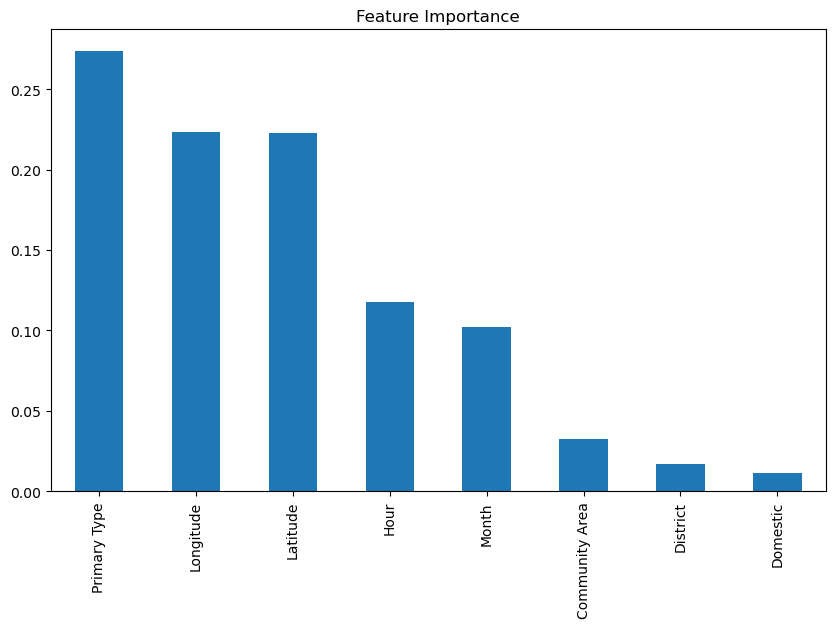

In [57]:
# Feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


## **Future Work and Recommendations**

While the current analysis has provided valuable insights into crime trends and arrest predictions, there are several areas that require further exploration. Here is what I plan to work on in the future to improve the quality of the analysis and its applicability:

---

### **Future Plans**
1. **Enhanced Predictive Modeling**:
   - Incorporate additional data, such as socioeconomic factors, weather patterns, and proximity to public spaces, to improve the accuracy and interpretability of the models.
   - Experiment with advanced machine learning techniques like Neural Networks and Gradient Boosting frameworks to achieve better predictive performance.

2. **Addressing Statistical Model Limitations**:
   - Tackle the issue of class imbalance that has led to poor performance in predicting arrests (`True` cases), despite high accuracy for non-arrests (`False` cases). 
   - Implement techniques such as SMOTE for oversampling or weighted models to better balance the dataset.
   - Include more arrest-specific features, such as police deployment data, criminal history, and contextual neighborhood factors, to enhance arrest prediction.

3. **Clustering Refinement**:
   - Validate and refine crime clusters using alternative clustering techniques, such as DBSCAN or hierarchical clustering, to ensure robust identification of crime hotspots.
   - Conduct longitudinal analysis to observe how crime clusters evolve over time and assess the impact of policy changes.

4. **In-Depth Crime Dynamics Study**:
   - Investigate interactions between key features, such as "Primary Type" and location, to understand nuanced relationships between crime types and hotspots.
   - Examine temporal patterns within clusters to identify the most critical times for intervention.

---

### **Recommendations for Next Steps**
1. **Data Expansion and Integration**:
   - Collaborate with city agencies to integrate external datasets (e.g., census data, unemployment rates) for a more comprehensive view of crime dynamics.
   - Include real-time police resource allocation data to link arrest rates to patrol schedules and resource distribution.

2. **Targeted Policy Suggestions**:
   - Focus on high-risk crime types (e.g., theft and battery) and high-impact locations identified in this analysis for targeted interventions.
   - Deploy resources during critical hours and months, such as late-night hours and summer months, for maximum impact.

3. **Interactive Reporting**:
   - Create interactive dashboards that allow stakeholders to visualize trends, hotspots, and actionable insights in real time.
   - Use these dashboards to share key findings with policymakers, law enforcement, and community organizations.

4. **Iterative Updates**:
   - Plan periodic updates of the analysis as new data becomes available to ensure findings and recommendations remain relevant and actionable.
   - Revisit feature engineering and model selection to align with emerging patterns in the data.

---

### **Reflection and Commitment**
The analysis conducted so far has highlighted strengths, such as identifying key features like "Primary Type" and location, but also limitations, particularly in arrest prediction for minority classes. I am committed to addressing these challenges by:
- Enhancing data preprocessing to balance class distributions.
- Testing additional features and methodologies to improve predictive accuracy.
- Using clustering and advanced techniques to further refine actionable insights.

This forward-looking plan ensures that future work not only builds on the current findings but also delivers more impactful, data-driven solutions for crime prevention and resource optimization.